<a href="https://colab.research.google.com/github/ramtiin/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time, sys
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

Download the dataset from Kaggle. You need download the Kaggle API token ("kaggle.json) first and put it in the main directory.


Read [this](https://medium.com/unpackai/how-to-use-kaggle-datasets-in-google-colab-f9b2e4b5767c) article for more information.

In [ ]:
! pip install -q kaggle

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

! kaggle datasets download -d mlg-ulb/creditcardfraud
! unzip creditcardfraud.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-09-15 20:16:36          12275  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           7441  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3035  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2905  
promptcloud/care

#Loading Data

In [ ]:
Data = pd.read_csv("creditcard.csv",low_memory=False)
Data = Data.drop(["Time"],axis=1)
Data = Data.dropna()

In [ ]:
Data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#Data distribution

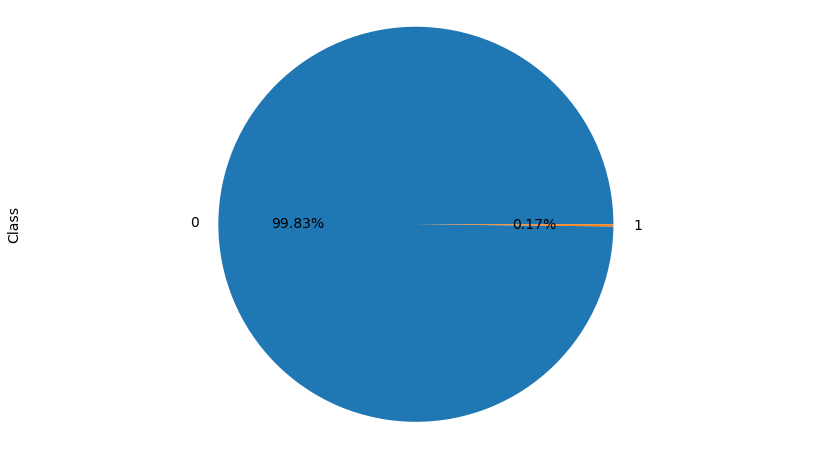

 Target Result 
 0    284315
1       492
Name: Class, dtype: int64 




In [ ]:
plt.figure(figsize=(14,8))
plt.rc('font', size=14)          # controls default text sizes
Data['Class'].value_counts().plot(kind = 'pie',autopct='%1.2f%%')
plt.axis('equal')
plt.show()
print(" Target Result \n",Data['Class'].value_counts(),"\n\n")

Our data is highly imbalanced!

#Correlation

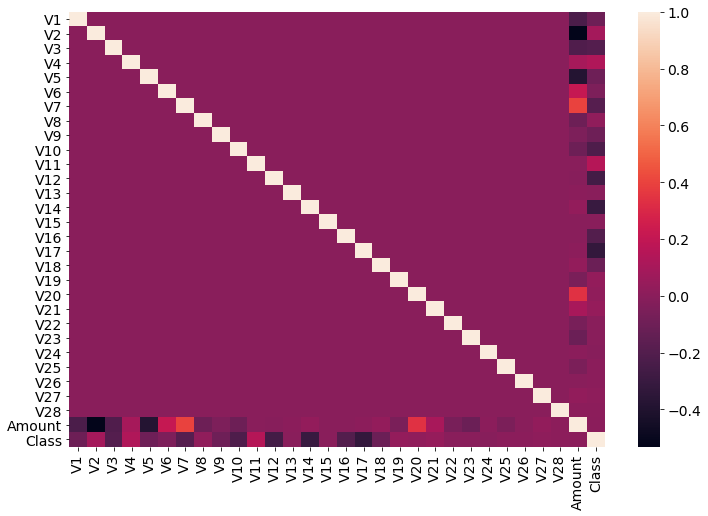

Note :-A correlation of 0 means that no relationship exists between the two variables, whereas a correlation of 1 indicates a perfect positive relationship.


In [ ]:
plt.figure(figsize=(12,8))

sns.heatmap(Data.corr())
plt.show()

print("Note :-A correlation of 0 means that no relationship exists between the two variables, whereas a correlation of 1 indicates a perfect positive relationship.")

#Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data.iloc[:,:-1], Data.iloc[:,-1], test_size = 0.2, random_state = 1)

#Classic machine learning methods with Catboost algorithm 

##Dealing with imbalanced data

One approach to addressing the problem of class imbalance is to randomly resample the training dataset. The two main approaches to randomly resampling an imbalanced dataset are to delete examples from the majority class, called undersampling, and to duplicate examples from the minority class, called oversampling.

Here, we will use both approaches provided by the imbalanced-learn Python library.

In [ ]:
!pip install --upgrade imbalanced-learn

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.0


In [ ]:
# import the Random Under Sampler object.
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# create the object.
under_sampler = RandomUnderSampler()
over_sampler = RandomOverSampler()

# fit the object to the training data.
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

Our data now is balanced.

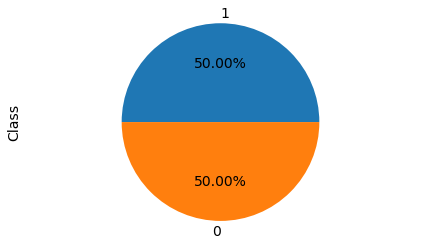

 Target Result 
 1    227440
0    227440
Name: Class, dtype: int64 




In [ ]:
plt.figure(figsize=(7,4))
plt.rc('font', size=14)          # controls default text sizes
y_train_over.value_counts().plot(kind = 'pie',autopct='%1.2f%%')
plt.axis('equal')
plt.show()
print(" Target Result \n",y_train_over.value_counts(),"\n\n")

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
CLF_over = CatBoostClassifier(silent=True)
CLF_under = CatBoostClassifier(silent=True)

In [ ]:
# Fit the data to the model
CLF_under.fit(X_train_under, y_train_under)
CLF_over.fit(X_train_over, y_train_over)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

In [ ]:
y_pred_under = CLF_under.predict(X_test)
y_pred_over = CLF_over.predict(X_test)

##Oversampling results

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred=y_pred_over, y_true=y_test)
print(cm)
print("Accuracy:",accuracy_score(y_pred=y_pred_over, y_true=y_test))
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print("f1:",f1_score(y_test, y_pred_over))
print("Recall:",recall_score(y_pred=y_pred_over, y_true=y_test))
print("Precision:",precision_score(y_pred=y_pred_over, y_true=y_test))

[[56861    14]
 [   16    71]]
Accuracy: 0.9994733330992591
f1: 0.8255813953488372
Recall: 0.8160919540229885
Precision: 0.8352941176470589


##Undersampling results

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred=y_pred_under, y_true=y_test)
print(cm)
print("Accuracy:",accuracy_score(y_pred=y_pred_under, y_true=y_test))
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print("f1:",f1_score(y_test, y_pred_under))
print("Recall:",recall_score(y_pred=y_pred_under, y_true=y_test))
print("Precision:",precision_score(y_pred=y_pred_under, y_true=y_test))

[[56134   741]
 [   11    76]]
Accuracy: 0.9867982163547628
f1: 0.168141592920354
Recall: 0.8735632183908046
Precision: 0.09302325581395349


Overall, the oversampling method give us better result. However, If detecting frauds is our first priority, no matter how it costs, we can consider using undersampling method.


##Importance of each features on model output

In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 5.2 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491640 sha256=c2a490b0de43c18045908e34cf9d32cc79764019af4bb901b649bdecc9419ec5
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap
explainer = shap.TreeExplainer(CLF_over)
shap_values = explainer.shap_values(X_train_over)

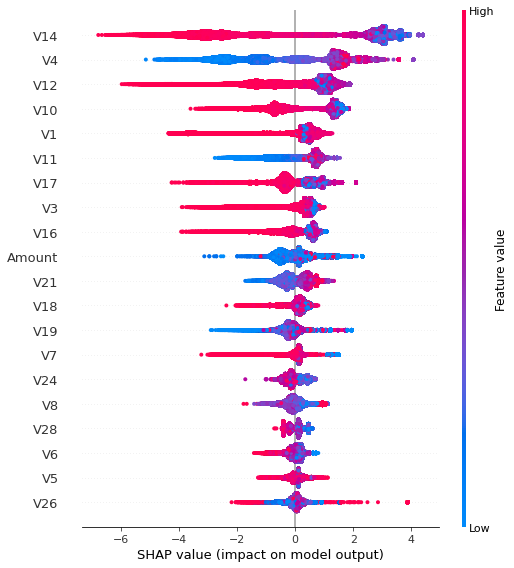

In [ ]:
shap.summary_plot(shap_values, X_train_over)

V14 has the most impact on the model output.

#Deep learning and autoencoder

AutoEncoder is an unsupervised Artificial Neural Network that attempts to encode the data by compressing it into the lower dimensions (bottleneck layer or code) and then decoding the data to reconstruct the original input. The bottleneck layer (or code) holds the compressed representation of the input data. The number of hidden units in the code is called code size.

AutoEncoders are widely used in anomaly detection. The reconstruction errors are used as the anomaly scores.


To detect anomalies in a high-dimension dataset using autoencoders, the following steps will be performed:


1.   During the training, input is only normal transactions. The bottleneck layer will learn the latent representation of the normal input data.
2.   The Decoder will use the bottleneck layers output to reconstruct the normal transactions of the original input data.
3.   There are differences between a fraudulent transaction and a normal transaction. The Autoencoder will have difficulty reconstructing the fraudulent transaction, resulting in a high reconstruction error.

4.   You can flag a new transaction is fraudulent based on a specified threshold value for the reconstruction error.

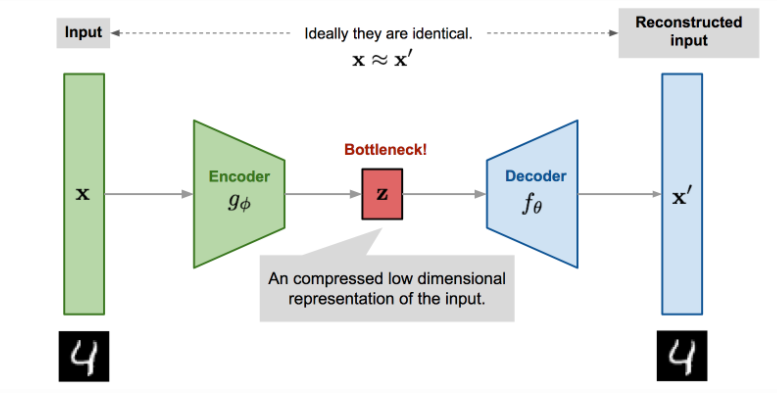

##Normalizing data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_data = sc.fit_transform(X_train)
test_data = sc.transform(X_test)
train_labels = y_train
test_labels = y_test

##Splitting normal and fraud data

We train the model using only normal data

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)
#creating normal and fraud datasets
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]
anomalous_train_data = train_data[train_labels]
anomalous_test_data = test_data[test_labels]
print(" No. of records in Fraud Train Data=",len(anomalous_train_data))
print(" No. of records in Normal Train data=",len(normal_train_data))
print(" No. of records in Fraud Test Data=",len(anomalous_test_data))
print(" No. of records in Normal Test data=",len(normal_test_data))

 No. of records in Fraud Train Data= 405
 No. of records in Normal Train data= 227440
 No. of records in Fraud Test Data= 87
 No. of records in Normal Test data= 56875


##Model structure

In [ ]:
nb_epoch = 50
batch_size = 128
input_dim = normal_train_data.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2) #
hidden_dim_2=4  
learning_rate = 1e-7

In [ ]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))
#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh", 
                                activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)
# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)
#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
dense_36 (Dense)             (None, 14)                420       
_________________________________________________________________
dropout_6 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 7)                 105       
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 32        
_________________________________________________________________
dense_39 (Dense)             (None, 7)                 35        
_________________________________________________________________
dropout_7 (Dropout)          (None, 7)                 0   

In [ ]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                               mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

##Training

In [ ]:
history = autoencoder.fit(normal_train_data, normal_train_data,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_data, test_data),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/50
1777/1777 [==============================] - 5s 2ms/step - loss: 0.0158 - val_loss: 0.0017

Epoch 00001: val_loss improved from inf to 0.00170, saving model to best_model.h5
Epoch 2/50
1777/1777 [==============================] - 4s 2ms/step - loss: 0.0016 - val_loss: 0.0015

Epoch 00002: val_loss improved from 0.00170 to 0.00145, saving model to best_model.h5
Epoch 3/50
1777/1777 [==============================] - 4s 2ms/step - loss: 0.0014 - val_loss: 0.0013

Epoch 00003: val_loss improved from 0.00145 to 0.00131, saving model to best_model.h5
Epoch 4/50
1777/1777 [==============================] - 4s 2ms/step - loss: 0.0013 - val_loss: 0.0013

Epoch 00004: val_loss improved from 0.00131 to 0.00129, saving model to best_model.h5
Epoch 5/50
1777/1777 [==============================] - 4s 2ms/step - loss: 0.0013 - val_loss: 0.0013

Epoch 00005: val_loss improved from 0.00129 to 0.00129, saving model to best_model.h5
Epoch 6/50
1777/1777 [==============================] - 4s 

In [ ]:
from tensorflow import keras
autoencoder = keras.models.load_model("best_model.h5",custom_objects={'leaky_relu': tf.keras.layers.LeakyReLU()})

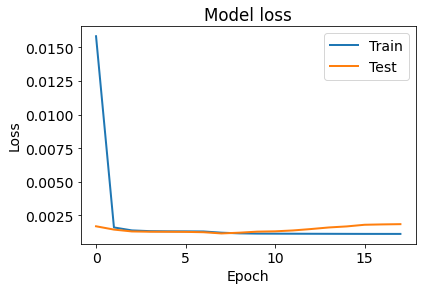

In [ ]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

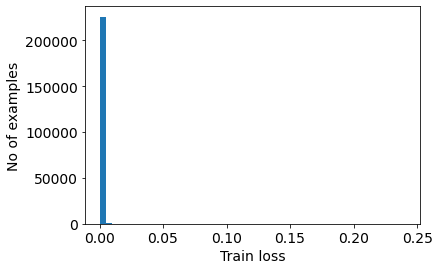

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mse(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

##Choosing a threshold 

Choose a threshold value that is one standard deviations above the mean.

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.0030097882733085652


##Results

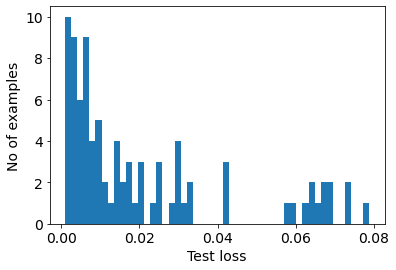

In [ ]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mse(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mse(reconstructions, data)
  return tf.math.logical_not (tf.math.less(loss, threshold))

def print_stats(predictions, labels):
  conf_matrix = confusion_matrix(labels, predictions)
  plt.figure(figsize=(8, 6))
  LABELS = ["Normal","Anomalous"]
  sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
  plt.title("Confusion matrix")
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.show()
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

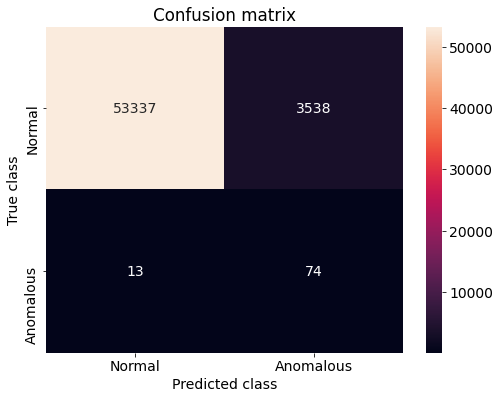

Accuracy = 0.937660194515642
Precision = 0.020487264673311186
Recall = 0.8505747126436781


In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

In [ ]:
reconstructions = autoencoder.predict(test_data)
mse = tf.keras.losses.mse(reconstructions, test_data)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_labels})

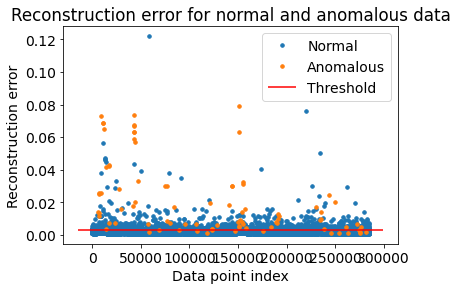

In [ ]:
threshold_fixed = threshold
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Anomalous" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and anomalous data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();